In [31]:
from scipy.stats import linregress
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from citipy import citipy
import requests
API ="31697d8893e02d5dbcc9aabc4b0f978c"
output_file = "output_info/some_name.csv"

longitude_range_parameters = (-180, 180)
latitude_range_parameters = (-90, 90)

In [32]:
lat = []
citi_info = []
long = np.random.uniform(low=-180.000, high=180.000, size=1500)
latit = np.random.uniform(low=-90.000, high=90.000, size=1500)
la2ngs = zip(latit, long)
for lat_lng in la2ngs:
    citi_info_data = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if citi_info_data not in citi_info:
        citi_info.append(citi_info_data)

len(citi_info)

632

In [ ]:
link_of_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + API 

information_of_cities = []

print("LET THE SHOW BEGIN!!"'(''\'''.''.''/'')')
print("*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x")

rec_counter = 1
set_counter = 1

for i, city in enumerate(citi_info):
        
    if (i % 50 == 0 and i >= 50):
        set_counter += 1
        rec_counter = 0

    url_of_cities = link_of_url + "&q=" + citi_info_data
    
    print("Cooking in the lab  %s of dish %s | and yea %s" % (rec_counter, set_counter, city))

    rec_counter += 1

    try:
        weather_parser = requests.get(url_of_cities).json()

        city_lat = weather_parser["coord"]["lat"]
        city_lng = weather_parser["coord"]["lon"]
        city_max_temp = weather_parser["main"]["temp_max"]
        city_humidity = weather_parser["main"]["humidity"]
        city_clouds = weather_parser["clouds"]["all"]
        city_wind = weather_parser["wind"]["speed"]
        city_country = weather_parser["sys"]["country"]
        city_date = weather_parser["dt"]

        information_of_cities.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    except:
        print("DATA NOT FOUND NEXT")
        pass
              
print("*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x")
print("Retrieval Complete")
print("*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x")
        
        

LET THE SHOW BEGIN!!('../)
*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x*x
Cooking in the lab  1 of dish 1 | and yea port elizabeth
Cooking in the lab  2 of dish 1 | and yea itoman
Cooking in the lab  3 of dish 1 | and yea port alfred
Cooking in the lab  4 of dish 1 | and yea ngukurr
Cooking in the lab  5 of dish 1 | and yea tasiilaq
Cooking in the lab  6 of dish 1 | and yea lata
Cooking in the lab  7 of dish 1 | and yea georgetown
Cooking in the lab  8 of dish 1 | and yea butaritari
Cooking in the lab  9 of dish 1 | and yea ushuaia
Cooking in the lab  10 of dish 1 | and yea hilo
Cooking in the lab  11 of dish 1 | and yea marsabit
Cooking in the lab  12 of dish 1 | and yea los llanos de aridane
Cooking in the lab  13 of dish 1 | and yea atuona
Cooking in the lab  14 of dish 1 | and yea rincon
Cooking in the lab  15 of dish 1 | and yea alekseyevsk
Cooking in the lab  16 of dish 1 | and yea hobart
Cooking in the lab  17 of dish 1 | and yea vaini
Cooking in the lab  18 of dish 

In [23]:
pandas_city = pd.DataFrame(information_of_cities)


cloud_DAATA = pandas_city["Cloudiness"]
wind_DAATA = pandas_city["Wind Speed"]
max_temps_DAATA = pandas_city["Max Temp"]
humid_DAATA = pandas_city["Humidity"]
latit = pandas_city["Lat"]

pandas_city.to_csv(output_file, index_label="City_ID")

pandas_city.count()

City          604
Lat           604
Lng           604
Max Temp      604
Humidity      604
Cloudiness    604
Wind Speed    604
Country       604
Date          604
dtype: int64

In [24]:
pandas_city.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,teknaf,-16.48,-151.75,81.72,74,29,14.03,PF,1588886755
1,punta arenas,-16.48,-151.75,81.72,74,29,14.03,PF,1588886755
2,broome,-16.48,-151.75,81.72,74,29,14.03,PF,1588886755
3,ostrov,-16.48,-151.75,81.72,74,29,14.03,PF,1588886755
4,north myrtle beach,-16.48,-151.75,81.72,74,29,14.03,PF,1588886755


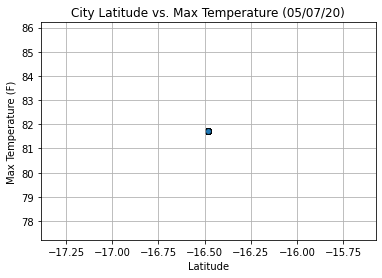

In [25]:
plt.scatter(latit, 
            max_temps_DAATA,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)


plt.show()

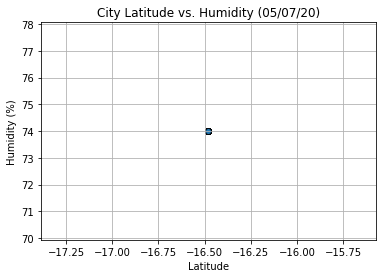

In [26]:
plt.scatter(latit, 
            humid_DAATA,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


plt.show()

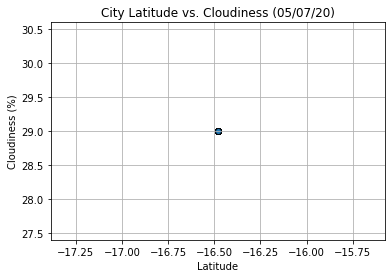

In [28]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(latit, 
            cloud_DAATA,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


plt.show()

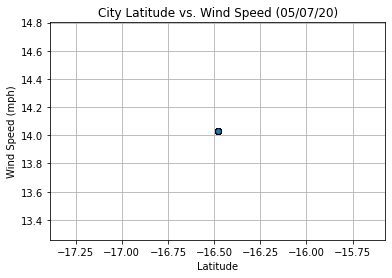

In [30]:
plt.scatter(latit, 
            wind_DAATA,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


plt.show()